# Training neural network to predict ball position in a 3d space
## 1. Importing Libraries

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from utils.evaluate import evaluate_model
from utils.plot_maker import plot_maker_3d

## 2. Importing Data

In [23]:
# get all the red ball data
X_rec1 = pd.read_csv('../data-16-cams/red_ball_coordinates_128px_2024-03-19_17h07m.csv', decimal='.', delimiter=',')
X_rec2 = pd.read_csv('../data-16-cams/red_ball_coordinates_128px_2024-03-19_17h10m.csv', decimal='.', delimiter=',')
X_rec3 = pd.read_csv('../data-16-cams/red_ball_coordinates_128px_2024-03-19_17h21m.csv', decimal='.', delimiter=',')
X_rec4 = pd.read_csv('../data-16-cams/red_ball_coordinates_128px_2024-03-19_17h22m.csv', decimal='.', delimiter=',')
X_rec5 = pd.read_csv('../data-16-cams/red_ball_coordinates_128px_2024-03-19_17h23m.csv', decimal='.', delimiter=',')
X_rec6 = pd.read_csv('../data-16-cams/red_ball_coordinates_128px_2024-03-19_17h25m.csv', decimal='.', delimiter=',')
X_rec7 = pd.read_csv('../data-16-cams/red_ball_coordinates_128px_2024-03-19_17h27m.csv', decimal='.', delimiter=',')
X_rec8 = pd.read_csv('../data-16-cams/red_ball_coordinates_128px_2024-03-19_17h29m.csv', decimal='.', delimiter=',')
X_rec9 = pd.read_csv('../data-16-cams/red_ball_coordinates_128px_2024-03-19_17h30m.csv', decimal='.', delimiter=',')
X_rec10 = pd.read_csv('../data-16-cams/red_ball_coordinates_128px_2024-03-19_17h31m.csv', decimal='.', delimiter=',')

In [24]:
# get all the positions data
y_rec1 = pd.read_csv('../data-16-cams/positions_xyz_2024-03-19_17h07m.csv', decimal='.', delimiter=',').iloc[:-2]
y_rec2 = pd.read_csv('../data-16-cams/positions_xyz_2024-03-19_17h10m.csv', decimal='.', delimiter=',').iloc[:-2]
y_rec3 = pd.read_csv('../data-16-cams/positions_xyz_2024-03-19_17h21m.csv', decimal='.', delimiter=',').iloc[:-2]
y_rec4 = pd.read_csv('../data-16-cams/positions_xyz_2024-03-19_17h22m.csv', decimal='.', delimiter=',').iloc[:-2]
y_rec5 = pd.read_csv('../data-16-cams/positions_xyz_2024-03-19_17h23m.csv', decimal='.', delimiter=',').iloc[:-2]
y_rec6 = pd.read_csv('../data-16-cams/positions_xyz_2024-03-19_17h25m.csv', decimal='.', delimiter=',').iloc[:-2]
y_rec7 = pd.read_csv('../data-16-cams/positions_xyz_2024-03-19_17h27m.csv', decimal='.', delimiter=',').iloc[:-2]
y_rec8 = pd.read_csv('../data-16-cams/positions_xyz_2024-03-19_17h29m.csv', decimal='.', delimiter=',').iloc[:-2]
y_rec9 = pd.read_csv('../data-16-cams/positions_xyz_2024-03-19_17h30m.csv', decimal='.', delimiter=',').iloc[:-2]
y_rec10 = pd.read_csv('../data-16-cams/positions_xyz_2024-03-19_17h31m.csv', decimal='.', delimiter=',').iloc[:-2]

In [25]:
(X_rec1.shape, y_rec1.shape), (X_rec2.shape, y_rec2.shape), (X_rec3.shape, y_rec3.shape), (X_rec4.shape, y_rec4.shape), (X_rec5.shape, y_rec5.shape), (X_rec6.shape, y_rec6.shape), (X_rec7.shape, y_rec7.shape), (X_rec8.shape, y_rec8.shape), (X_rec9.shape, y_rec9.shape), (X_rec10.shape, y_rec10.shape)

(((511, 32), (511, 3)),
 ((509, 32), (509, 3)),
 ((506, 32), (506, 3)),
 ((506, 32), (506, 3)),
 ((507, 32), (507, 3)),
 ((505, 32), (505, 3)),
 ((504, 32), (504, 3)),
 ((507, 32), (507, 3)),
 ((506, 32), (506, 3)),
 ((506, 32), (506, 3)))

In [26]:
print(f"The amount of NaN in rec1: {X_rec1.isna().sum().sum()}")
print(f"The amount of NaN in rec2: {X_rec2.isna().sum().sum()}")
print(f"The amount of NaN in rec3: {X_rec3.isna().sum().sum()}")
print(f"The amount of NaN in rec4: {X_rec4.isna().sum().sum()}")
print(f"The amount of NaN in rec5: {X_rec5.isna().sum().sum()}")
print(f"The amount of NaN in rec6: {X_rec6.isna().sum().sum()}")
print(f"The amount of NaN in rec7: {X_rec7.isna().sum().sum()}")
print(f"The amount of NaN in rec8: {X_rec8.isna().sum().sum()}")
print(f"The amount of NaN in rec9: {X_rec9.isna().sum().sum()}")

The amount of NaN in rec1: 1442
The amount of NaN in rec2: 2930
The amount of NaN in rec3: 2442
The amount of NaN in rec4: 2606
The amount of NaN in rec5: 1654
The amount of NaN in rec6: 1312
The amount of NaN in rec7: 2180
The amount of NaN in rec8: 1228
The amount of NaN in rec9: 1668


### 2.3 Combine all the datasets

In [27]:
combo_1 = pd.concat([X_rec1, y_rec1], axis=1)
combo_2 = pd.concat([X_rec2, y_rec2], axis=1)
combo_3 = pd.concat([X_rec3, y_rec3], axis=1)
combo_4 = pd.concat([X_rec4, y_rec4], axis=1)
combo_5 = pd.concat([X_rec5, y_rec5], axis=1)
combo_6 = pd.concat([X_rec6, y_rec6], axis=1)
combo_7 = pd.concat([X_rec7, y_rec7], axis=1)
combo_8 = pd.concat([X_rec8, y_rec8], axis=1)
combo_9 = pd.concat([X_rec9, y_rec9], axis=1)
combo_10 = pd.concat([X_rec10, y_rec10], axis=1)

In [28]:
combo_1.dropna(inplace=True, thresh=31)
combo_2.dropna(inplace=True, thresh=31)
combo_3.dropna(inplace=True, thresh=31)
combo_4.dropna(inplace=True, thresh=31)
combo_5.dropna(inplace=True, thresh=31)
combo_6.dropna(inplace=True, thresh=31)
combo_7.dropna(inplace=True, thresh=31)
combo_8.dropna(inplace=True, thresh=31)
combo_9.dropna(inplace=True, thresh=31)
combo_10.dropna(inplace=True, thresh=31)

In [29]:
def splitup(combined_df):
    X_df = combined_df.iloc[:, :14]
    y_df = combined_df.iloc[:, 14:]
    return X_df, y_df

X_rec1, y_rec1 = splitup(combo_1)
X_rec2, y_rec2 = splitup(combo_2)
X_rec3, y_rec3 = splitup(combo_3)
X_rec4, y_rec4 = splitup(combo_4)
X_rec5, y_rec5 = splitup(combo_5)
X_rec6, y_rec6 = splitup(combo_6)
X_rec7, y_rec7 = splitup(combo_7)
X_rec8, y_rec8 = splitup(combo_8)
X_rec9, y_rec9 = splitup(combo_9)
X_rec10, y_rec10 = splitup(combo_10)

In [30]:
from utils.interpolation import interpolate_dataframe

X_rec1 = interpolate_dataframe(X_rec1)
X_rec2 = interpolate_dataframe(X_rec2)
X_rec3 = interpolate_dataframe(X_rec3)
X_rec4 = interpolate_dataframe(X_rec4)
X_rec5 = interpolate_dataframe(X_rec5)
X_rec6 = interpolate_dataframe(X_rec6)
X_rec7 = interpolate_dataframe(X_rec7)
X_rec8 = interpolate_dataframe(X_rec8)
X_rec9 = interpolate_dataframe(X_rec9)
X_rec10 = interpolate_dataframe(X_rec10)

In [31]:
X_train = pd.concat([X_rec1, X_rec2, X_rec3, X_rec4, X_rec5, X_rec6, X_rec7, X_rec8, X_rec9, X_rec10])
y_train = pd.concat([y_rec1, y_rec2, y_rec3, y_rec4, y_rec5, y_rec6, y_rec7, y_rec8, y_rec9, y_rec10])
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [32]:
X_train.isna().sum()

u0    0
v0    0
u1    0
v1    0
u2    0
v2    0
u3    0
v3    0
u4    0
v4    0
u5    0
v5    0
u6    0
v6    0
dtype: int64

In [33]:
X_train.shape, y_train.shape

((2754, 14), (2754, 21))

In [34]:
combined = pd.concat([X_train, y_train], axis=1)

## 3. Data Preprocessing

In [35]:
combined

,u0,v0,u1,v1,u2,v2,u3,v3,u4,v4,...,v12,u13,v13,u14,v14,u15,v15,x,y,z
0,52.0,40.0,111.0,85.0,126.0,86.0,11.0,89.5,65.0,86.0,...,51.0,125.0,50.0,11.0,85.0,NaN,NaN,6.804196,3.246184,23.39432
1,49.0,41.5,107.0,86.0,122.5,87.0,7.0,90.0,62.0,87.0,...,52.0,121.5,51.5,7.0,86.0,43.0,85.0,7.240541,3.351472,23.67617
2,49.0,41.0,105.0,86.0,120.0,87.0,5.5,90.0,60.5,87.0,...,52.0,119.0,52.0,5.0,86.5,41.0,86.0,7.692725,3.522852,23.86853
3,46.0,44.0,103.0,88.5,117.0,89.5,2.0,93.0,57.5,89.5,...,54.0,116.0,54.0,2.0,89.0,38.5,87.5,7.939070,3.642185,24.30696
4,44.5,45.0,107.0,87.5,115.0,89.0,1.0,93.0,56.5,89.5,...,55.0,115.0,54.0,1.0,89.0,37.0,88.0,8.423635,3.974353,24.69106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2749,54.0,38.0,113.0,83.0,126.5,83.5,13.0,87.0,67.0,85.0,...,49.0,127.0,48.0,13.0,83.0,48.0,82.0,6.901770,2.837732,23.36369
2750,53.0,40.0,112.0,84.0,127.0,85.0,12.0,88.0,66.0,85.0,...,50.0,127.0,49.0,12.0,84.0,47.5,83.5,6.991238,3.013493,23.44117
2751,52.5,40.5,111.5,85.5,126.0,86.0,11.5,89.0,66.0,86.0,...,51.0,126.0,50.5,11.5,85.5,47.0,84.0,7.081077,3.192217,23.51897
2752,52.0,41.5,111.0,87.0,126.0,87.0,11.0,90.0,65.0,87.5,...,52.0,125.5,51.5,10.0,87.0,46.0,85.5,7.171067,3.372125,23.59690


In [36]:
# check for missing values
print(f'The data has missing values: {combined.isna().sum().sum()}')
# drop all rows that have more then 3 NaN values
combined.dropna(inplace=True)
print(f'The data has missing values: {combined.isna().sum().sum()}')

The data has missing values: 1438
The data has missing values: 0


In [37]:
X = combined.iloc[:, :32]
y = combined.iloc[:, 32:]

In [38]:
X.shape, y.shape

((2036, 32), (2036, 3))

In [39]:
# scale the data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

## 4. Hyperparameter Tuning

In [40]:
# create a pipeline
pipeline = Pipeline([
    ('mlp', MLPRegressor(random_state=42))
])

In [41]:
# Best parameters: {'mlp__solver': 'adam', 'mlp__max_iter': 28000, 'mlp__learning_rate_init': 0.01, 'mlp__learning_rate': 'adaptive', 'mlp__hidden_layer_sizes': (50, 100, 50), 'mlp__early_stopping': True, 'mlp__alpha': 0.001, 'mlp__activation': 'relu'}
# model = MLPRegressor(random_state=42, max_iter=28000, learning_rate_init=0.01, learning_rate='adaptive', hidden_layer_sizes=(50, 100, 50), early_stopping=True, alpha=0.001, activation='relu')

param_grid = {
    'mlp__hidden_layer_sizes': 
        [(50, 100, 50) # ,(100,), (64, 32, 64)],
         ],
    'mlp__activation': ['identity', 'tanh', 'relu'],
    'mlp__solver': ['sgd', 'adam'],
    'mlp__alpha': [0.001, 0.01, 0.1],
    'mlp__max_iter': [10000, 20000, 28000],
    'mlp__learning_rate': ['constant', 'adaptive'],
    'mlp__learning_rate_init': [0.001, 0.01, 0.1],
    'mlp__early_stopping': [True],
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, cv=5, n_iter=100, n_jobs=-1, verbose=3, random_state=42)

random_search.fit(X_scaled, y_scaled)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\xande\venv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\xande\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\xande\venv\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\xande\venv\lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\xande\venv\lib\site-

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('mlp',
                                              MLPRegressor(random_state=42))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'mlp__activation': ['identity', 'tanh',
                                                            'relu'],
                                        'mlp__alpha': [0.001, 0.01, 0.1],
                                        'mlp__early_stopping': [True],
                                        'mlp__hidden_layer_sizes': [(50, 100,
                                                                     50)],
                                        'mlp__learning_rate': ['constant',
                                                               'adaptive'],
                                        'mlp__learning_rate_init': [0.001, 0.01,
                                                                    0.1],
                                        'mlp__max_iter': [10000, 20000, 28000],
                                        'mlp__solver': ['sgd', 'adam']},
                   random_state=42, verbose=3)

In [42]:
print(f'Best parameters: {random_search.best_params_}')
print(f'Best score: {random_search.best_score_}')

Best parameters: {'mlp__solver': 'adam', 'mlp__max_iter': 20000, 'mlp__learning_rate_init': 0.001, 'mlp__learning_rate': 'constant', 'mlp__hidden_layer_sizes': (50, 100, 50), 'mlp__early_stopping': True, 'mlp__alpha': 0.001, 'mlp__activation': 'relu'}
Best score: 0.8569961144324211


In [43]:
model = random_search.best_estimator_

## 5. Training the Model

In [44]:
model.fit(X_scaled, y_scaled)

Pipeline(steps=[('mlp',
                 MLPRegressor(alpha=0.001, early_stopping=True,
                              hidden_layer_sizes=(50, 100, 50), max_iter=20000,
                              random_state=42))])

## 6. Make Predictions On Test Data

In [45]:
import pandas as pd

In [46]:
X_test_8_a = pd.read_csv('../data-16-cams/red_ball_coordinates_128px_2024-03-19_17h30m.csv', decimal='.', delimiter=',')
X_test_8_b = pd.read_csv('../data-16-cams/red_ball_coordinates_128px_2024-03-19_17h31m.csv', decimal='.', delimiter=',')

In [47]:
y_test_8_a = pd.read_csv('../data-16-cams/positions_xyz_2024-03-19_17h30m.csv', decimal='.', delimiter=',').iloc[:-2]
y_test_8_b = pd.read_csv('../data-16-cams/positions_xyz_2024-03-19_17h31m.csv', decimal='.', delimiter=',').iloc[:-2]

In [48]:
(X_test_8_a.shape, y_test_8_a.shape), (X_test_8_b.shape, y_test_8_b.shape)

(((506, 32), (506, 3)), ((506, 32), (506, 3)))

In [49]:
combo_test_a = pd.concat([X_test_8_a, y_test_8_a], axis=1)
combo_test_b = pd.concat([X_test_8_b, y_test_8_b], axis=1)

In [50]:
#combo_test_a.dropna(inplace=True, thresh=31)
#combo_test_b.dropna(inplace=True, thresh=31)

In [51]:
X_test_8_a, y_test_8_a = splitup(combo_test_a)
X_test_8_b, y_test_8_b = splitup(combo_test_b)

In [52]:
X_test_8_a = interpolate_dataframe(X_test_8_a)
X_test_8_b = interpolate_dataframe(X_test_8_b)

In [53]:
(X_test_8_a.shape, y_test_8_a.shape), (X_test_8_b.shape, y_test_8_b.shape)

(((506, 14), (506, 21)), ((506, 14), (506, 21)))

In [54]:
def prepare_and_scale_test_data(X_test_val, y_test_val, scaler_x_test):
    combined_test = pd.concat([X_test_val, y_test_val], axis=1)
    combined_test.dropna(inplace=True)
    X_val = combined_test.iloc[:, :32]
    y_val = combined_test.iloc[:, 32:]
    X_scaled_test = scaler_x_test.transform(X_val)
    return X_scaled_test, y_val

In [55]:
def predict_evaluate_plot(X_test_val_scaled, y_test_val, nn_model, scaler_y_test, title='Trajectory of Ball in 3D Space'):
    y_test_predicted_scaled = nn_model.predict(X_test_val_scaled)
    y_test_pred = scaler_y_test.inverse_transform(y_test_predicted_scaled)
    mse, mae, r2 = evaluate_model(y_test_val, y_test_pred, 'Test Data')
    # change col 1 and 2 from place, so it corresponds to the unity 3d space
    y_test_pred = y_test_pred[:, [0, 2, 1]]
    y_test_val = y_test_val.to_numpy()[:, [0, 2, 1]]
    plot_maker_3d(y_test_val, y_test_pred, title)
    return y_test_pred, mse, mae, r2

Mean Squared Error on Test Data Set: 0.05641677337107694
Mean Absolute Error on Test Data Set: 0.1703041525574812
R2 Score on Test Data set: -1.7446271732756324


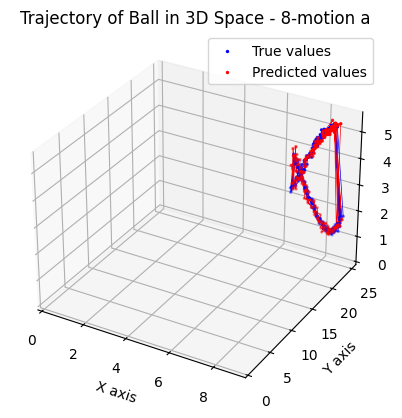

In [56]:
X_test_8_scaled_a, y_test_8_a = prepare_and_scale_test_data(X_test_8_a, y_test_8_a, scaler_x)
X_test_8_pred_a, mse_8_a, mae_8_a, r2_8_a = predict_evaluate_plot(X_test_8_scaled_a, y_test_8_a, model, scaler_y, title='Trajectory of Ball in 3D Space - 8-motion a')

Mean Squared Error on Test Data Set: 0.043464992997381546
Mean Absolute Error on Test Data Set: 0.12884313748785825
R2 Score on Test Data set: 0.8672136069960178


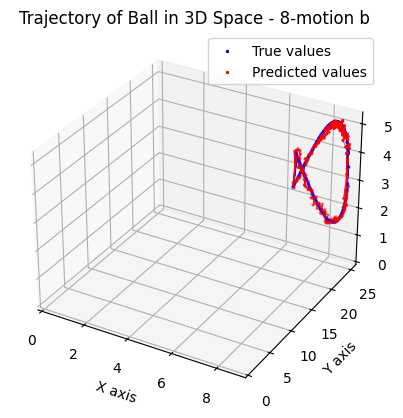

In [57]:
X_test_8_scaled_b, y_test_8_b = prepare_and_scale_test_data(X_test_8_b, y_test_8_b, scaler_x)
X_test_8_pred_b, mse_8_b, mae_8_b, r2_8_b = predict_evaluate_plot(X_test_8_scaled_b, y_test_8_b, model, scaler_y, title='Trajectory of Ball in 3D Space - 8-motion b')

